In [1]:
import numpy as np
import pickle
import os
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from modules.md_utils import coord_initiales_ion, complementaire, longueur_file, longueur_intro

from modules.md_c_interface import launch_simulation

from time import time, sleep

# 1ère partie, états finaux des N ions

Ions should be selected amongst the ones available [here](../md2_notebook_resources/available_ion.png).

As for the parameters, a lots of them are available. You can see them all in [1](../md2_notebook_resources/table_key_description_1.png), [2](../md2_notebook_resources/table_key_description_2.png) and [3](../md2_notebook_resources/table_key_description_3.png).

For simplicity reasons, only a few are available in the following algorithms : ion, ionE, Tset, ionT, ionP, tau, n, dt, dtv and i1.

Which should be given for example like :

```python
params = {
    '-ion' : "Ar",
    '-ionE' : 50, # eV
    '-Tset' : 300, # K
    '-ionT' : 0, # Degree
    '-ionP' : 0, # Degree
    '-tau' : 0.01, # s
    '-n' : 250, # nb time steps
    '-dt' : 1.e-3, # time step, s
    '-i1' : 2, 
}

flags = ['+dtv']
```

In [4]:
paths_to_h = ['/home/paul/anaconda3/envs/NIRN/include'] # by order of importance 

name = 'cf3_test'

params = {
    '-ion' : "Ar",
    '-ionE' : 50, # eV
    '-Tset' : 300, # K
    '-ionT' : 0, # Degrees
    '-ionP' : 0, # Degree
    '-tau' : 0.01, # s
    '-n' : 250, # nb time steps
    '-dt' : 1.e-3, # time step, s
    '-i1' : 2, 
}

flags = ['+dtv']

In [5]:
launch_simulation(name, params, flags, paths_to_h)

./md2 -oc cfg/####.cfg -ion Ar -ionE 50 -Tset 300 -ionT 0 -ionP 0 -tau 0.01 -n 250 -dt 0.001 -i1 2 +dtv  > log &


In [5]:
# Extraction données
from pathlib import Path
for i in range(2):
    path = r"{}/md2_sources/cf3_test/ion/{}.ion".format(Path.cwd(),complementaire(i))
    long=longueur_file(path)
    if i==0:
        df=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]")
    else:
        line=pd.read_csv(path, header=None,usecols=np.arange(0,10).tolist(), skiprows=long-1, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'],sep="[:,; ]")
        frames = [df, line]
        df = pd.concat(frames)
    
df.drop(['Time step', 'Integration time', '#b'], axis='columns', inplace=True)
df.reset_index()

FileNotFoundError: [Errno 2] No such file or directory: '/home/paul/Documents/projects/Neutralisation_Faisceau_ions_negatifs_propulsion_satellite/md2_sources/cf3_test/ion/0001.ion'

/home/paul/anaconda3/envs/NIRN/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


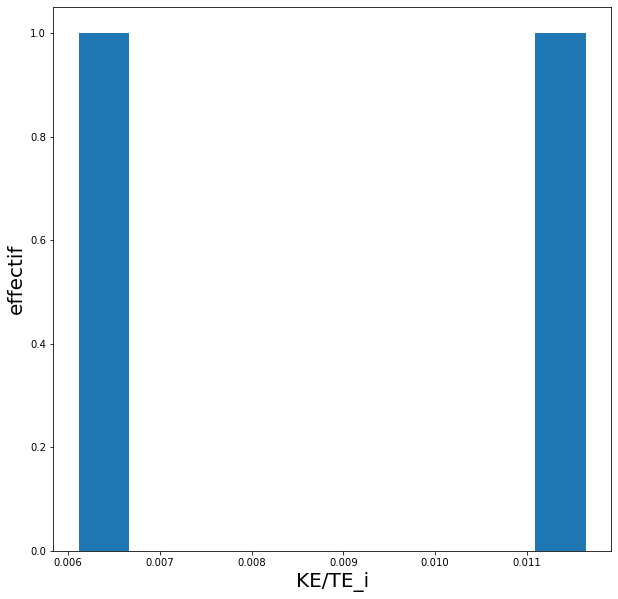

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.hist(df['KE/TE_i'])
ax.set_xlabel('KE/TE_i',size=20)
ax.set_ylabel('effectif',size=20)

fig.show()

# 2ème partie, étude détaillée d'une trajectoire

In [5]:
name = 'cf3_test_2'
params = {
    '-ion' : "Ar",
    '-ionE' : 25, # eV
    '-Tset' : 300, # K
    '-ionT' : 0, # Degree
    '-ionP' : 60, # Degree
    #'-tau' : 0.001, # s
    '-n' : 1000, # nb time steps
    '-dt' : 1.e-3, # time step, s
    '-i1' : 5, 
}

flags = ['+dtv']

In [6]:
launch_simulation(name, params, flags)

./md2 -oc cfg/####.cfg -ion Ar -ionE 25 -Tset 300 -ionT 0 -ionP 60 -n 1000 -dt 0.001 -i1 5 +dtv  > log &


In [24]:
# Extraction données
sleep(1) # because sometimes the file is not created yet (or complete thuse it gives an error)

path = r"{}/md2_sources/{}/ion/0001.ion".format(Path.cwd(), name)

l = longueur_intro(path)
print(l)
df=pd.read_csv(path, header=None, skiprows=l, names=['Time step','Integration time','KE/TE_i','internal PE','external PE','d.x','d.y','d.z','norm(d)','#b','imp?'], sep=" ")
print(len(df.values))
xini,yini,zini = coord_initiales_ion(path)
df['x']=xini+df['d.x']
df['y']=yini+df['d.y']
df['z']=zini+df['d.z']

df.drop(['#b','d.x', 'd.y','d.z'], axis='columns', inplace=True)
df.set_index('Time step')

8
1001


,Integration time,KE/TE_i,internal PE,external PE,norm(d),imp?,x,y,z
Time step,,,,,,,,,
0,0.000,1.000000,0.0,0.000000,0.00000,0,-4.63154,6.36584,16.96479
1,0.001,1.000000,0.0,0.000000,0.10989,0,-4.63154,6.36584,16.85490
2,0.002,1.000000,0.0,0.000000,0.21978,0,-4.63154,6.36584,16.74501
3,0.003,1.000000,0.0,0.000000,0.32967,0,-4.63154,6.36584,16.63512
4,0.004,1.000000,0.0,0.000000,0.43956,0,-4.63154,6.36584,16.52523
...,...,...,...,...,...,...,...,...,...
996,0.996,0.009255,0.0,0.106911,10.95959,1,-1.98816,4.14570,6.56305
997,0.997,0.009197,0.0,0.107023,10.96547,1,-1.99429,4.14015,6.55649
998,0.998,0.009139,0.0,0.107114,10.97125,1,-2.00044,4.13456,6.55004


In [25]:
dx=df['x'].values[-1]-df['x'].values[-2]
dy=df['y'].values[-1]-df['y'].values[-2]
dz=df['z'].values[-1]-df['z'].values[-2]
dr=np.sqrt(dx**2+dy**2+dz**2)

theta_sortie=np.arccos(dz/dr)*180/np.pi
if(dx != 0):
    phi_sortie=np.arctan(dy/dx)*180/np.pi
else :
    print('Ion did not leave.')
print("theta_sortie = {}".format(theta_sortie))
print("phi_sortie = {}".format(phi_sortie))

theta_sortie = 126.50918747579202
phi_sortie = 42.25075601839705


In [26]:
def get_df_crystal(path):
    cols = ['id','type','x',\
       'y','z','vx','vy','vz','fix ?']
    df_crystal=pd.read_csv(path, header=None, skiprows=longueur_intro(path), names=cols, sep="\t")
    return df_crystal


def plot_crystal(ax, dataframe, radii, colors, dir1, dir2, alpha = 0.1):
    for index, row in dataframe.iterrows():
        ax.add_patch(plt.Circle((row[dir1], row[dir2]), radii[row['type']], \
                                color = colors[row['type']], alpha = alpha))
        
def plot(type_ion, df_ion, df_crystal, radii, colors, start = True):    
    xmin, xmax = min(np.min(df_crystal['x']),np.min(df_ion['x'])), max(np.max(df_crystal['x']),np.max(df_ion['x']))
    ymin, ymax = min(np.min(df_crystal['y']),np.min(df_ion['y'])), max(np.max(df_crystal['y']),np.max(df_ion['y']))
    zmin, zmax = min(np.min(df_crystal['z']),np.min(df_ion['z'])), max(np.max(df_crystal['z']),np.max(df_ion['z']))

    fig, axes = plt.subplots(1,2, figsize = (20,10))
    axes[0].axis('equal')
    axes[0].set(xlim=(xmin, xmax), ylim = (zmin, zmax))
    plot_crystal(axes[0], df_crystal, radii, colors, 'x', 'z', alpha = 0.1)
    axes[0].set_xlabel(r'x ($\AA$)')
    axes[0].set_ylabel(r'z ($\AA$)')

    axes[1].axis('equal')
    axes[1].set(xlim=(ymin, ymax), ylim = (zmin, zmax))
    plot_crystal(axes[1], df_crystal, radii, colors, 'y', 'z', alpha = 0.1)
    axes[1].set_xlabel(r'y ($\AA$)')
    axes[1].set_ylabel(r'z ($\AA$)')
    
    if(start):
        axes[0].add_patch(plt.Circle((df_ion['x'][0],df_ion['z'][0]), radii[type_ion], color = colors[type_ion]))
        axes[0].plot(df_ion['x'], df_ion['z'], color = colors[type_ion], linewidth = 3)

        axes[1].add_patch(plt.Circle((df_ion['y'][0],df_ion['z'][0]), radii[type_ion], color = colors[type_ion]))
        axes[1].plot(df_ion['y'], df_ion['z'], color = colors[type_ion], linewidth = 3)
    else:
        l = len(df_ion['x'])
        axes[0].add_artist(plt.Circle((df_ion['x'][l-1],df_ion['z'][l-1]), radii[type_ion], color = colors[type_ion]))
        axes[1].add_artist(plt.Circle((df_ion['y'][l-1],df_ion['z'][l-1]), radii[type_ion], color = colors[type_ion]))

    plt.show()

In [27]:
colors = {
    'Si':'gray',
    'Ar':'darkviolet',
}
radii = {
    'Si': 1.11, # Angstrom
    'Ar' : 1.06
}

In [28]:
paths_to_crytal = [
    r"{}/md2_sources/aSi.cfg".format(Path.cwd()), # celui de base
    r"{}/md2_sources/{}/cfg/0000.cfg".format(Path.cwd(), name),
    r"{}/md2_sources/{}/cfg/0001.cfg".format(Path.cwd(), name),
    r"{}/md2_sources/{}/cfg/0002.cfg".format(Path.cwd(), name),
    r"{}/md2_sources/{}/cfg/0003.cfg".format(Path.cwd(), name),
    r"{}/md2_sources/{}/cfg/0004.cfg".format(Path.cwd(), name)
]

df_crystal_base = get_df_crystal(paths_to_crytal[0])
df_crystal_0 = get_df_crystal(paths_to_crytal[1])
df_crystal_1 = get_df_crystal(paths_to_crytal[2])

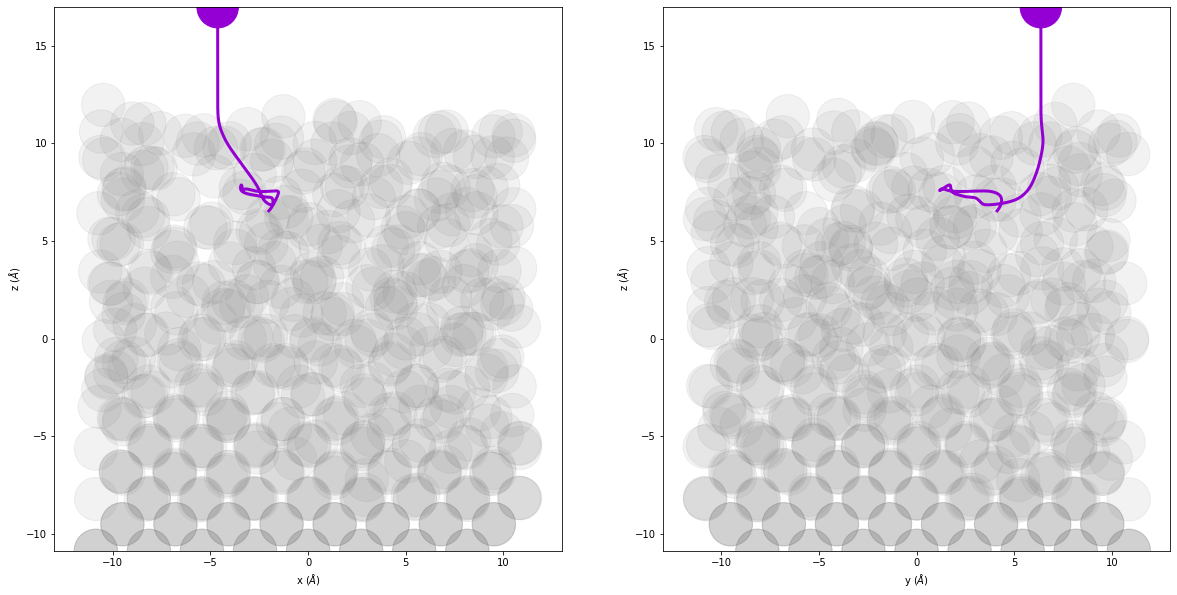

In [29]:
plot('Ar', df, df_crystal_base, radii, colors, start = True)

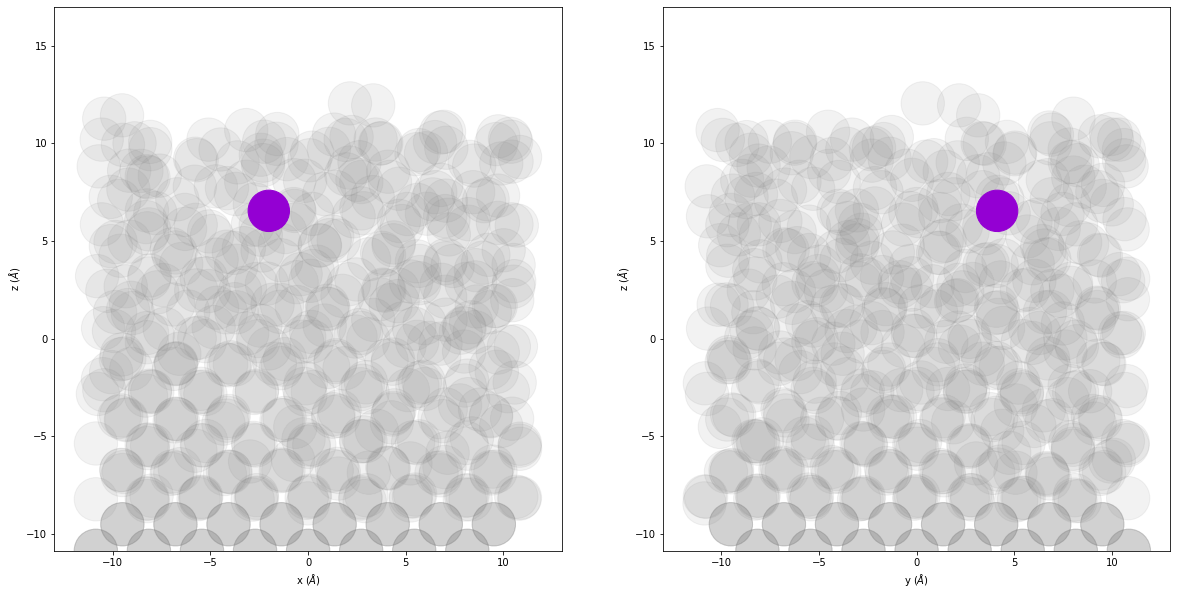

In [30]:
plot('Ar', df, df_crystal_1, radii, colors, start = False)

In [97]:
fig = go.Figure(
        data=go.Scatter3d(
            x=df['x'], 
            y=df['y'], 
            z=df['z'], 
            marker=dict(
                size=2,
                color=df['KE/TE_i'],
                colorscale='magma'
                ),
            line=dict(
                color='darkblue',
                width=2
                )
            )
        )

fig.update_layout(
    width=1000, 
    height=700, 
    scene = dict( 
        xaxis_title='X (A)',
        yaxis_title='Y (A)',
        zaxis_title='Z (A)'
        ),
    margin=dict(
        r=0, 
        b=100, 
        l=0, 
        t=100
        ),
    plot_bgcolor='white'
    )

fig.show()

In [98]:
dx=df['x'].values[-1]-df['x'].values[-2]
dy=df['y'].values[-1]-df['y'].values[-2]
dz=df['z'].values[-1]-df['z'].values[-2]
dr=np.sqrt(dx**2+dy**2+dz**2)

theta_sortie=np.arccos(dz/dr)*180/np.pi
phi_sortie=np.arctan(dy/dx)*180/np.pi

print(theta_sortie)
print(phi_sortie)

180.0
nan


/home/paul/anaconda3/envs/NIRN/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars

